In [1]:
import json

geojson = {
  "type": "FeatureCollection",
  "features": [
    {
      "type": "Feature",
      "properties": {},
      "geometry": {
        "coordinates": [
          24.246667038198012,
          12.891982026993958
        ],
        "type": "Point"
      }
    }
  ]
}


import climdata
clim_ds = climdata.extract_data(
    overrides=[
            "dataset=mswx",
            "variables=['tasmin']",
            "data_dir=/beegfs/muduchuru/data",
            f"time_range.start_date=2020-12-01",
            f"time_range.end_date=2020-12-31",
            f"aoi='{json.dumps(geojson)}'",
            "dsinfo.mswx.params.google_service_account=./.climdata_conf/service.json",
    ]
)

✅ All 31 tasmin files already exist locally.
ℹ️ No index selected (cfg.index is None). Skipping index computation.
✅ Saved output to mswx_surface_LAT_12.891982026993958_LON_24.246667038198012_20201201_20201231.csv


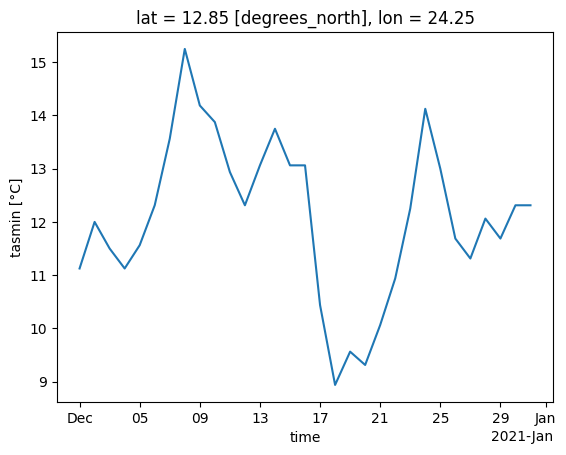

In [1]:
import json

geojson = {'type': 'FeatureCollection', 'features': [{'id': 'YQYMn0RtqfIYFlVSuBRNa78VOV5eGN6l', 'type': 'Feature', 'properties': {}, 'geometry': {'coordinates': [[[0.3489189054060944, 23.354454949438832], [7.903907963894596, 23.638032033731335], [7.669846441330236, 18.791303400710987], [-1.2471156321152819, 18.62954836205158], [0.3489189054060944, 23.354454949438832]]], 'type': 'Polygon'}}]}

import climdata
mswx = climdata.extract_data(
    overrides=[
            "dataset=cmip",
            "variables=['tasmin']",
            "data_dir=/beegfs/muduchuru/data",
            f"time_range.start_date=2020-12-01",
            f"time_range.end_date=2020-12-31",
            f"aoi='{json.dumps(geojson)}'",
            "dsinfo.mswx.params.google_service_account=./.climdata_conf/service.json",
    ]
)

Saved NetCDF to cmip_surface_LAT18.62954836205158-23.638032033731335_LON-1.2471156321152819-7.903907963894596_20201201_20201231.nc
ℹ️ No index selected (cfg.index is None). Skipping index computation.
✅ Saved output to cmip_surface_LAT18.62954836205158-23.638032033731335_LON-1.2471156321152819-7.903907963894596_20201201_20201231.nc


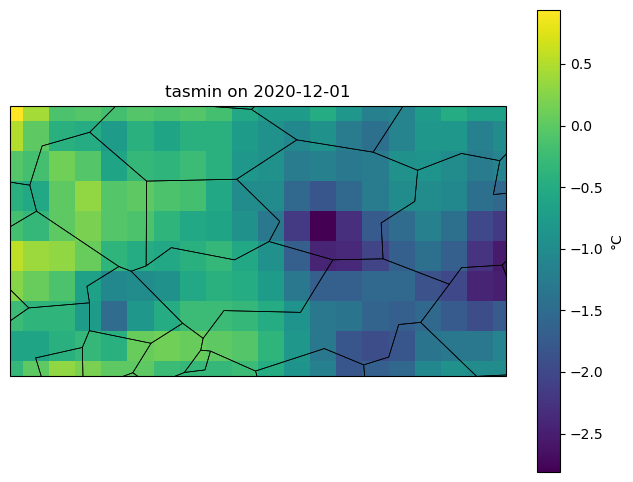

In [34]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from gisco_geodata import NUTS
# Open the NetCDF file
file_path = "mswx_surface_LAT50-51_LON8-10_20201201_20201231.nc"
ds = xr.open_dataset(file_path)
# print(ds)  # check variable names and dimensions

# Select variable and timestep
var_name='tasmin'
data = ds[var_name].isel(time=0)  # first timestep

# Create plot with curvilinear coordinates
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})

lat = ds["lat"].values
lon = ds["lon"].values
lat_min, lat_max = lat.min(), lat.max()
lon_min, lon_max = lon.min(), lon.max()

# pcolormesh with 2D lat/lon coordinates
im = ax.pcolormesh(
    lon,  # 2D lon
    lat,  # 2D lat
    data,
    cmap='viridis',
    transform=ccrs.PlateCarree()
)
nuts = NUTS()
nuts3 = nuts.get(nuts_level="LEVL_3", spatial_type="RG")
nuts3.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5, transform=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"{var_name} on {str(data['time'].values)[:10]}")
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# Add colorbar
fig.colorbar(im, ax=ax, orientation='vertical', label=str(data.attrs.get('units', '')))

plt.show()


In [22]:
import climdata
hyras = climdata.extract_data(
    overrides=[
            "dataset=hyras",
            "variables=['tasmin']",
            "table_id=day",
            "data_dir=./data",
            f"time_range.start_date=2020-12-01",
            f"time_range.end_date=2020-12-31",
            "bounds.custom={lat_min:50,lat_max:51,lon_min:8,lon_max:10}",
            "region=custom",
    ]
)

../../examples/conf
⬇️  Checking: https://opendata.dwd.de/climate_environment/CDC/grids_germany/daily/hyras_de/air_temperature_min/tasmin_hyras_1_2020_v6-0_de.nc
✔️  Exists locally: ./data/hyras/TASMIN/tasmin_hyras_1_2020_v6-0_de.nc
📦 Extracted curvilinear box with shape: FrozenMappingWarningOnValuesAccess({'time': 366, 'bnds': 2, 'x': 145, 'y': 110})
✅ Saved output to hyras_surface_LAT50-51_LON8-10_20201201_20201231.nc


<xarray.Dataset> Size: 47MB
Dimensions:  (time: 366, y: 110, x: 145)
Coordinates:
  * time     (time) datetime64[ns] 3kB 2020-01-01T12:00:00 ... 2020-12-31T12:...
    lon      (y, x) float64 128kB ...
    lat      (y, x) float64 128kB ...
  * x        (x) float32 580B 4.178e+06 4.178e+06 ... 4.32e+06 4.322e+06
  * y        (y) float32 440B 2.99e+06 2.99e+06 ... 3.098e+06 3.098e+06
Data variables:
    tasmin   (time, y, x) float64 47MB ...
Attributes: (12/21)
    source:                 surface observations
    institution:            Deutscher Wetterdienst (DWD)
    Conventions:            CF-1.11
    title:                  gridded_temperature_dataset_(HYRAS-DE TASMIN)
    realization:            v6-0
    project_id:             HYRAS
    ...                     ...
    license:                The HYRAS data, produced by DWD, is licensed unde...
    ConventionsURL:         http://cfconventions.org/Data/cf-conventions/cf-c...
    realm:                  atmos
    product:              

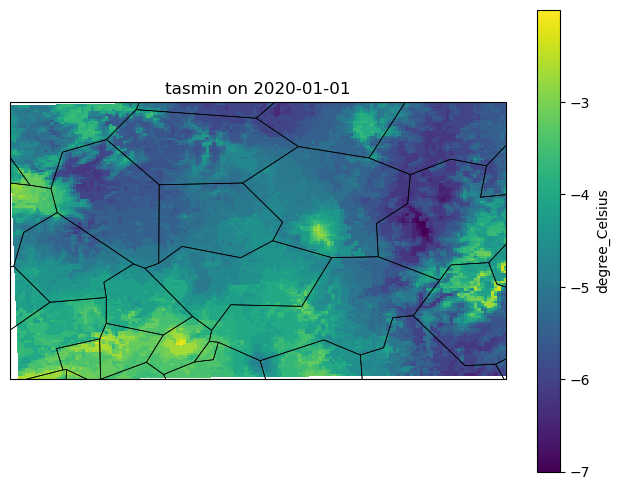

In [ ]:
import xarray as xr
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from gisco_geodata import NUTS
# Open the NetCDF file
file_path = "hyras_surface_LAT50-51_LON8-10_20201201_20201231.nc"
ds = xr.open_dataset(file_path)
# print(ds)  # check variable names and dimensions

# Select variable and timestep
var_name = list(ds.data_vars)[0]  # replace with actual variable if needed
data = ds[var_name].isel(time=0)  # first timestep

# Create plot with curvilinear coordinates
fig, ax = plt.subplots(figsize=(8,6), subplot_kw={'projection': ccrs.PlateCarree()})

lat = ds["lat"].values
lon = ds["lon"].values
lat_min, lat_max = lat.min(), lat.max()
lon_min, lon_max = lon.min(), lon.max()

# pcolormesh with 2D lat/lon coordinates
im = ax.pcolormesh(
    lon,  # 2D lon
    lat,  # 2D lat
    data,
    cmap='viridis',
    transform=ccrs.PlateCarree()
)
nuts = NUTS()
nuts3 = nuts.get(nuts_level="LEVL_3", spatial_type="RG")
nuts3.plot(ax=ax, edgecolor="black", facecolor="none", linewidth=0.5, transform=ccrs.PlateCarree())
# Add coastlines and borders
ax.coastlines(resolution='10m')
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.set_title(f"{var_name} on {str(data['time'].values)[:10]}")
ax.set_extent([lon_min, lon_max, lat_min, lat_max], crs=ccrs.PlateCarree())
# Add colorbar
fig.colorbar(im, ax=ax, orientation='vertical', label=str(data.attrs.get('units', '')))

plt.show()
